# Image segmentation with K-means

***
### Imports and functions

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.cluster import KMeans

In [20]:
def draw(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

def get_kmeans_img(img, vectorized, criteria, K, attempts=10):
    _, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    label = label.flatten()
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    return result_image

***

### Get initial image

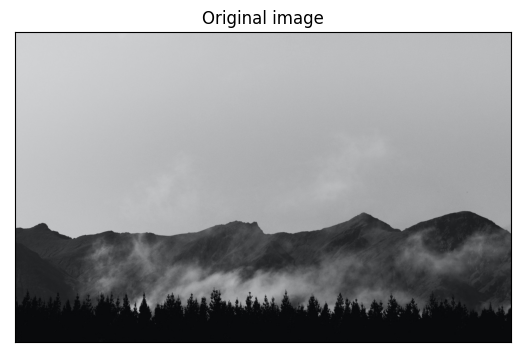

In [21]:
img = cv2.cvtColor(cv2.imread('img/image1.jpg'), cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1, 3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.1)

draw(img, 'Original image')
plt.show()

***
### Comparing segmented images

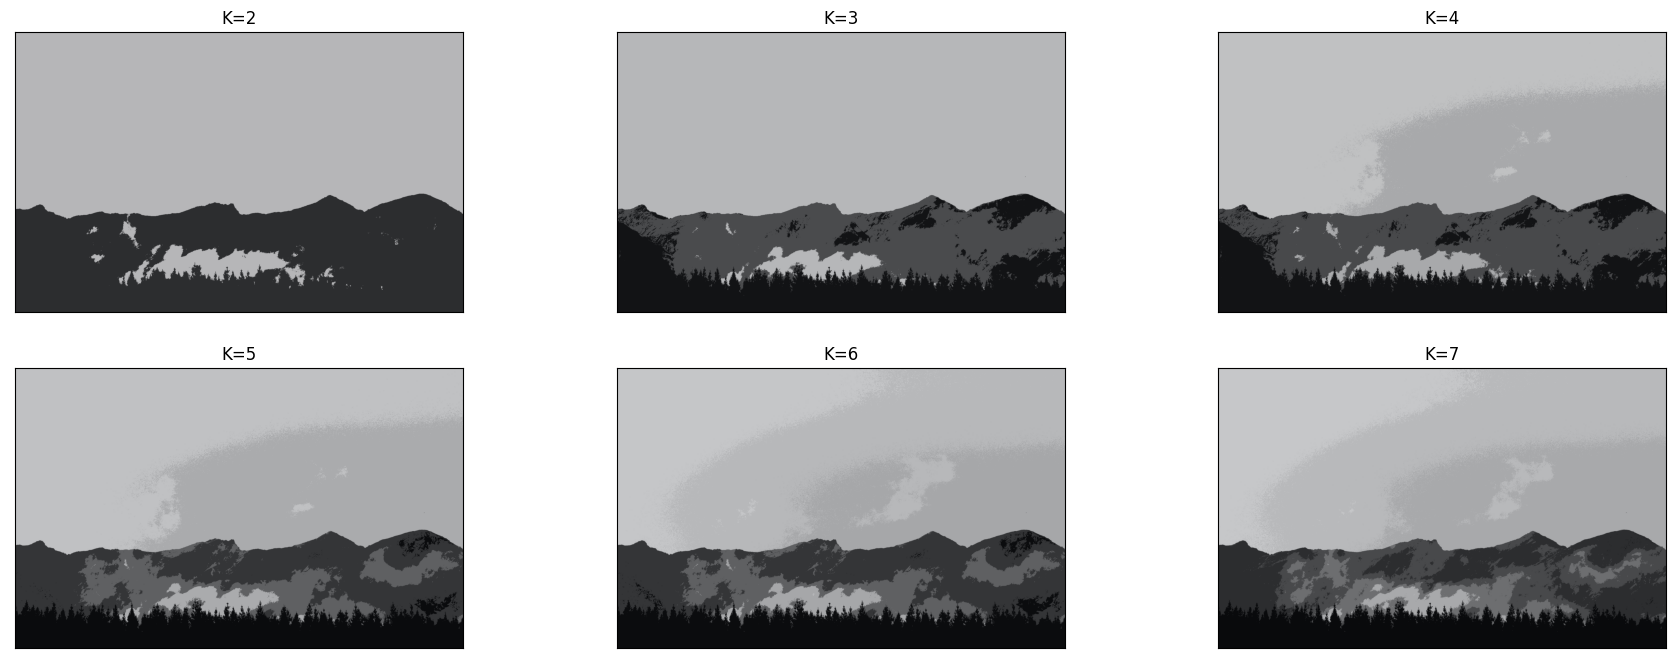

In [22]:
segmented = []
for K in [2,3,4,5,6,7]:
    _, label, center = cv2.kmeans(vectorized, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    label = label.flatten()
    center = np.uint8(center)
    res = center[label.flatten()]
    segmented.append(res.reshape((img.shape)))

fig = plt.figure(figsize=(22, 8))
grid = plt.GridSpec(2, 3)
for i, seg_img in enumerate(segmented, start=2):
    plt.subplot(grid[(i-2)//3, (i-2) % 3])
    draw(seg_img, f'K={i}')
plt.show()

> NOTE: We can see that by increasing the K value our segmented image begins to look a lot more like the original one and also the depth and sharpness of the segmented image gets better with bigger K value

## Colored image

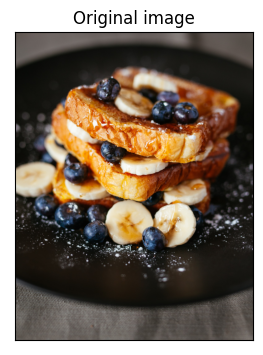

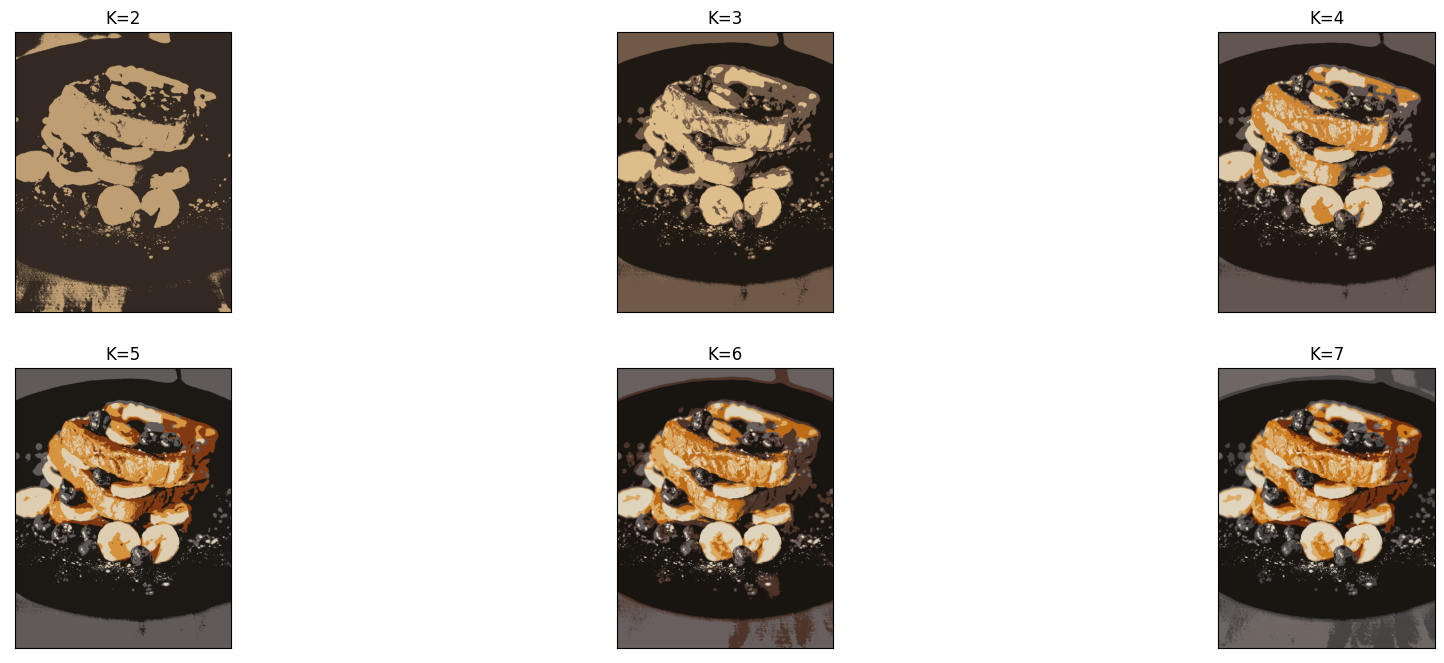

In [23]:
img = cv2.cvtColor(cv2.imread('img/image2.jpg'), cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1, 3)))
segmented = list(map(lambda k: get_kmeans_img(img, vectorized, criteria, K=k), [2, 3, 4, 5, 6, 7]))
plt.figure(figsize=(12, 4))
draw(img, title='Original image')
plt.show()
# fig = plt.figure(figsize=(16, 6))
grid = plt.GridSpec(2, 3)
for i, seg_img in enumerate(segmented, start=2):
    plt.subplot(grid[(i-2)//3, (i-2) % 3])
    draw(seg_img, f'K={i}')
plt.show()

> NOTE: We can see a significant difference when looking at the toast part of the picture - the picture gets sharper and the colors begin to settle nicely. The picture with K=7 has also very eye pleasing colors.

## Image with mostly one color

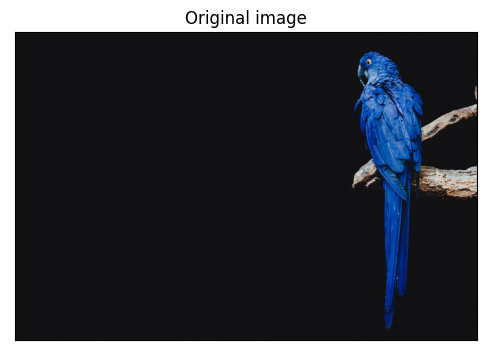

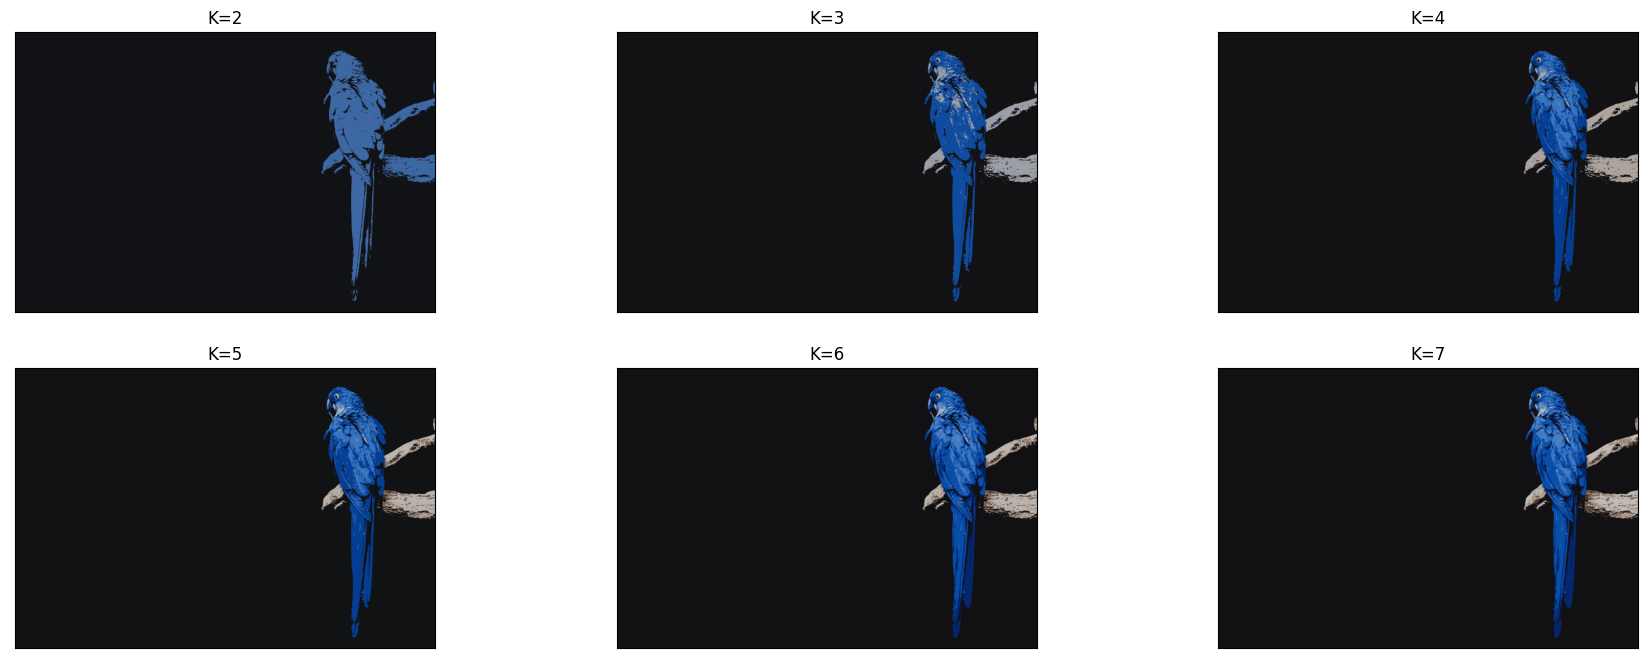

In [24]:
img = cv2.cvtColor(cv2.imread('img/image3.jpg'), cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1, 3)))
segmented = list(map(lambda k: get_kmeans_img(img, vectorized, criteria, K=k), [2, 3, 4, 5, 6, 7]))
plt.figure(figsize=(12, 4))
draw(img, title='Original image')
plt.show()
fig = plt.figure(figsize=(22, 8))
grid = plt.GridSpec(2, 3)
for i, seg_img in enumerate(segmented, start=2):
    plt.subplot(grid[(i-2)//3, (i-2) % 3])
    draw(seg_img, f'K={i}')
plt.show()

> NOTE: We can see that it was easy for the algorithm to form the picture into the clusters and the image with k=7 looks almost identical to the original one

## Image with an outline

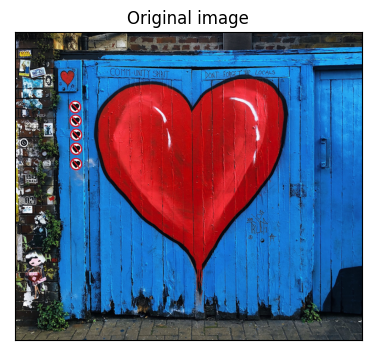

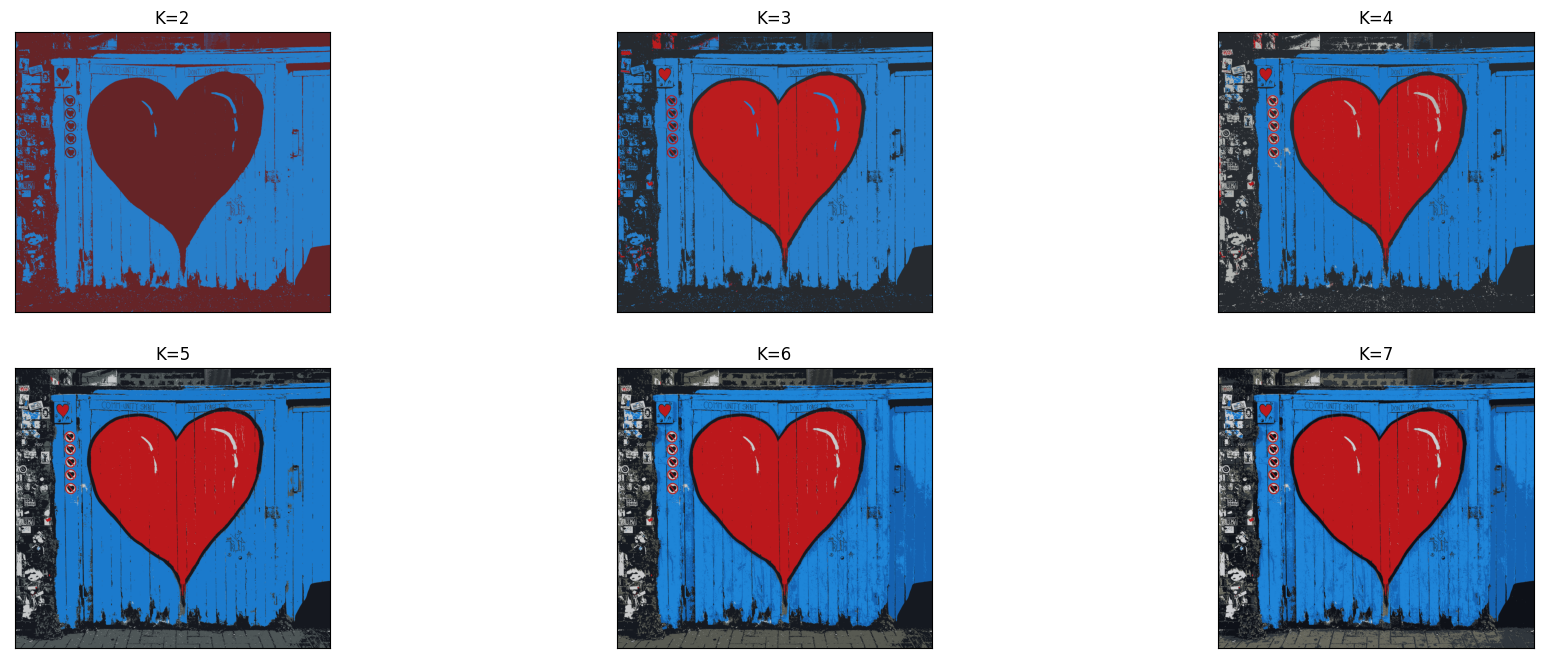

In [25]:
img = cv2.cvtColor(cv2.imread('img/image4.jpg'), cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1, 3)))
segmented = list(map(lambda k: get_kmeans_img(img, vectorized, criteria, K=k), [2, 3, 4, 5, 6, 7]))
plt.figure(figsize=(12, 4))
draw(img, title='Original image')
plt.show()
fig = plt.figure(figsize=(22, 8))
grid = plt.GridSpec(2, 3)
for i, seg_img in enumerate(segmented, start=2):
    plt.subplot(grid[(i-2)//3, (i-2) % 3])
    draw(seg_img, f'K={i}')
plt.show()

> NOTE: We got really nice results with K=6 - it gained a lot of sharpness. The k=4 and k=5 looks like a cartoon which is quite nice

## Very colorful image

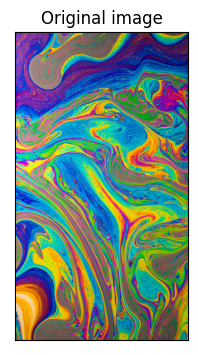

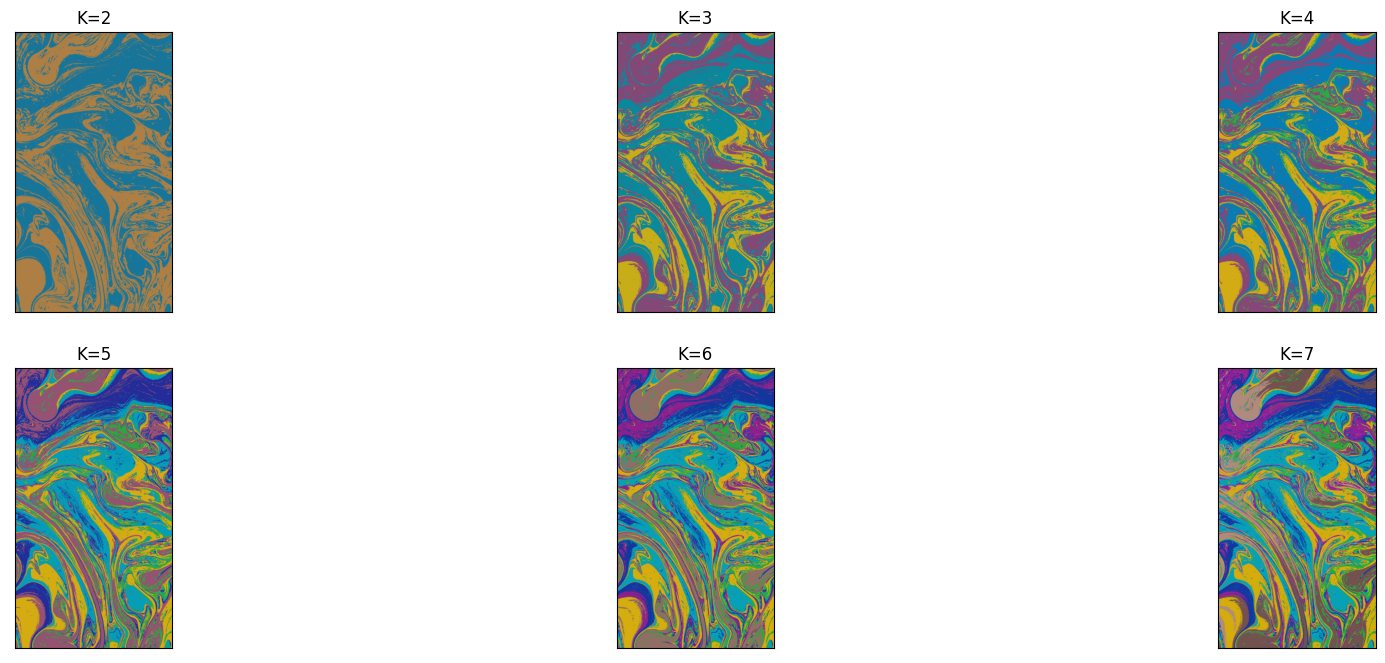

In [26]:
img = cv2.cvtColor(cv2.imread('img/image5.jpg'), cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1, 3)))
segmented = list(map(lambda k: get_kmeans_img(img, vectorized, criteria, K=k), [2, 3, 4, 5, 6, 7]))
plt.figure(figsize=(12, 4))
draw(img, title='Original image')
plt.show()
fig = plt.figure(figsize=(22, 8))
grid = plt.GridSpec(2, 3)
for i, seg_img in enumerate(segmented, start=2):
    plt.subplot(grid[(i-2)//3, (i-2) % 3])
    draw(seg_img, f'K={i}')
plt.show()

> NOTE: You can see how with k getting bigger we get another color put in the image

## Color to represent Cluster for K=5

In [27]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	
    # normalize the histogram
	hist = hist.astype("float")
	hist /= hist.sum()
	return hist

def plot_colors(hist, centroids):
	# bar chart representing the relative frequency of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of each cluster
	for (percent, color) in zip(hist, centroids):
		# relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(
            bar, 
            (int(startX), 0), 
            (int(endX), 50),
			color.astype("uint8").tolist(), 
            -1
        )
		startX = endX
	
	return bar

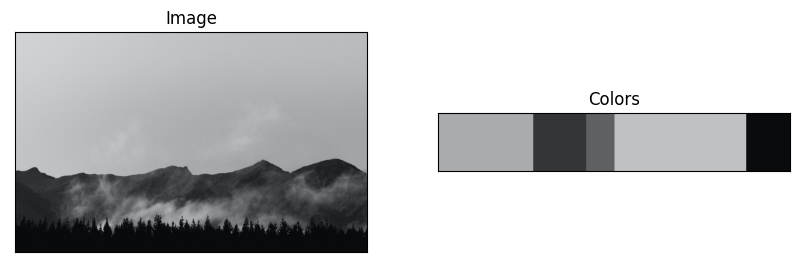

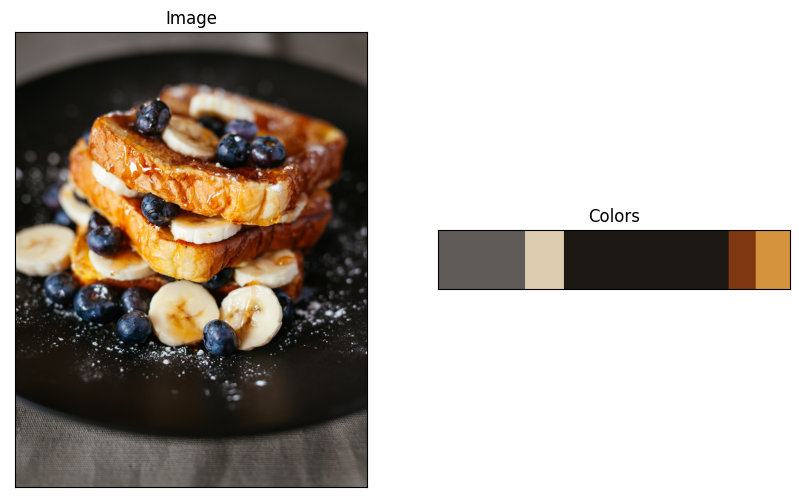

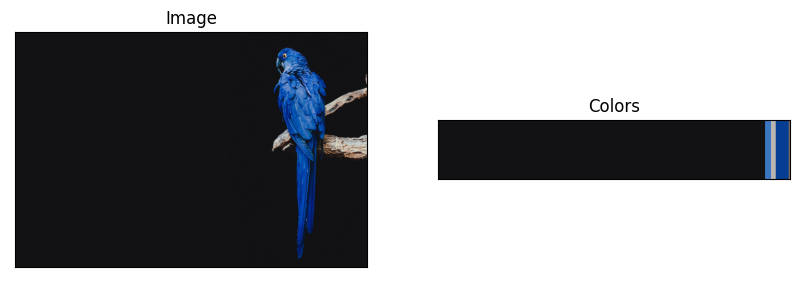

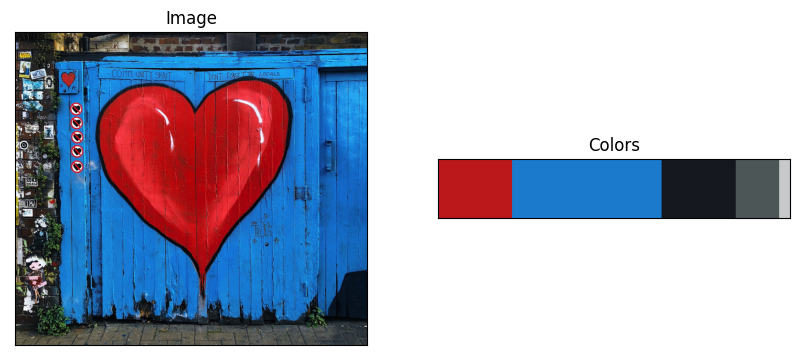

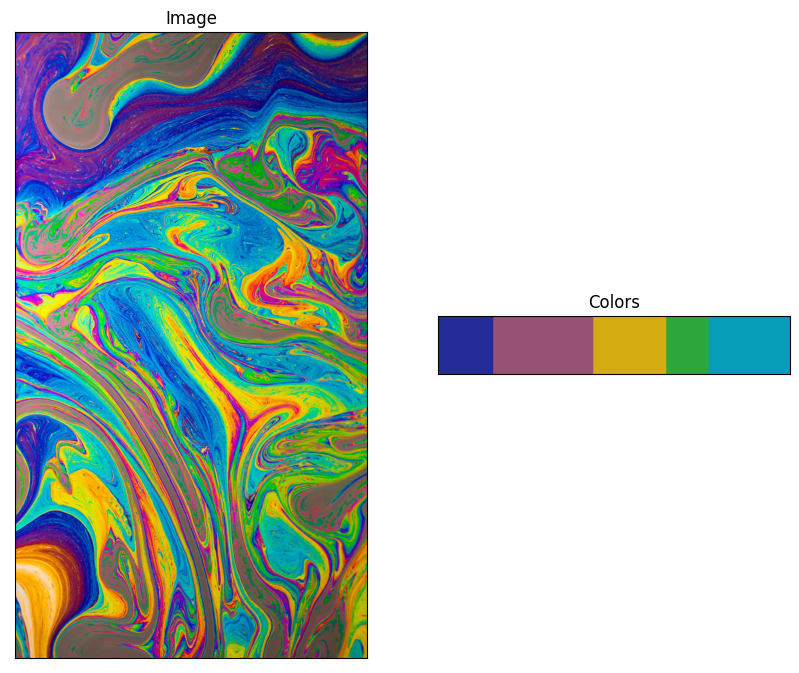

In [28]:
for file in [f'img/image{i}.jpg' for i in range(1,6)]:
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = image
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = 5)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    draw(img, 'Image')
    plt.subplot(1, 2, 2)
    draw(bar, 'Colors')
    plt.show()

> NOTE: We can see that the colors for the images containing least different colors the colorbar gets dominated by 1/2 colors that we would guess from looking at the picture with naked eye.  
On the other hand the pictures with more colors are dominated by gray-ish and dark-sih colors, since the K=5